{'red_300_sc.txt': 4.231512075383839e-05}


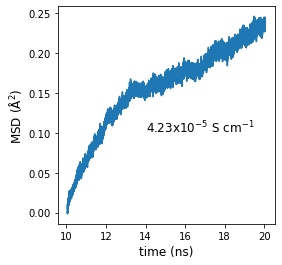

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import glob

##########
d = 3
charge = 3
conc = 4.44 * 10**(27)
haven = 1
##########

red = glob.glob('red_300_sc.txt')

data = [red]

diffusion_dict = {}
conductivity_dict = {}
conductivity_t_dict = {}

def plot_msd(msd_file):  

    # Import MSD files as lists:
    step, msd = np.loadtxt(msd_file, skiprows=2, unpack=True)
    
    # Find T:
    T = 400
    
    # Convert to nanoseconds:
    steps = step / 1000000
    
    # Remove initial jump:
    msd = msd - msd[1]

    # Plot MSD:   
    plt.plot(steps[1:], msd[1:])
    
    # Find diffusion coefficient:
    slope, intercept = np.polyfit(steps[4000:], msd[4000:], 1)
    dc = (slope * (10 ** (-11))) / (2*d)
    diffusion_dict[msd_file] = dc
    
        # Diffusion coefficient = d(msd)/d(t) / 2d
        #
        # unit conversion: A^2 to m^2 is 10**-20; ns to s is 10**9, so unit conversion is 10**-11
    
    # Find conductivity:
    cond = (((charge * 1.602 * 10**(-19))**2 * conc * dc * haven)/((1.381 * 10**(-23)) * T) * 10**(-2))
    conductivity_dict[msd_file] = cond
    conductivity_t_dict[msd_file] = cond * T
    
        # Conversion of diffusion coefficient to conductivity as follows:
        #
        # conducitivity = (charge**2 * charge carrier concentration * diffusion coefficient) / boltzmann constant * temperature
        #
        # charge is electron charge (sodium singularly charged), so 1.602 * 10**(-19) C
        #
        # charge carrier concentration calculated as number of Li/Sc/Cl ions in the simulation cell/cell dimensions
        #
        # diffusion coefficient calcualted as above fromm MSD plot slopes
        #
        # boltzmann constant = 1.381 * 10**(-23) J/K
        #
        # temperature varies with experiment
        #
        # !!! 10**(-2) added to get final results in S/cm as conventionally displayed
    
for dat in data:
    dat.sort()
    for f in dat:
        plot_msd(f)

#plt.ylim(0,2)        
        
plt.xlabel('time (ns)', size = 12)
plt.ylabel('MSD ($\mathrm{\AA^2})$', size = 12)

plt.text(14, 0.1, '$\mathrm{4.23 x 10^{-5}\ S\ cm^{-1}}$', size=12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

print(conductivity_dict)

plt.savefig('msd_sc.jpg', bbox_inches='tight', dpi=500)